# Importing Dependicies

In [1]:
import numpy as np
import pandas as pd
import pycaret
import os

In [2]:
os. getcwd()

'D:\\ml\\projects\\Pycaret'

# Loading Data

In [23]:
train_data=pd.read_csv(os.path.join('Dataset','train.csv'))
test_data=pd.read_csv(os.path.join('Dataset','test.csv'))

In [24]:
train_data.head()

,index,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0,72,1,2,136,209,1,0,111,1,-2.916701,3,1
1,1,61,1,3,113,341,0,0,186,1,1.317159,1,1
2,2,60,1,4,128,388,0,2,103,1,0.061226,1,0
3,3,65,1,3,136,201,1,2,142,0,1.230714,2,1
4,4,60,1,4,115,331,1,0,141,0,-0.162745,1,0


# Cleaning Data

In [25]:
train_data.isnull().sum()

index                  0
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [26]:
train_data.shape

(840, 13)

In [27]:
train_data.drop('index', inplace=True, axis=1)
test_data.drop('index', inplace=True, axis=1)

In [8]:
train_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,72,1,2,136,209,1,0,111,1,-2.916701,3,1
1,61,1,3,113,341,0,0,186,1,1.317159,1,1
2,60,1,4,128,388,0,2,103,1,0.061226,1,0
3,65,1,3,136,201,1,2,142,0,1.230714,2,1
4,60,1,4,115,331,1,0,141,0,-0.162745,1,0


# Creating Model

In [9]:
from pycaret.classification import *

In [10]:
exp_clf101 = setup(data = train_data, target = 'target')

,Description,Value
0,session_id,7378
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(840, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5469,0.5000,1.0000,0.5469,0.7071,0.0000,0.0000,0.0050
qda,Quadratic Discriminant Analysis,0.5366,0.5246,0.6633,0.5765,0.5931,0.0479,0.0437,0.0060
svm,SVM - Linear Kernel,0.5282,0.0000,0.7655,0.5931,0.6008,0.0139,0.0315,0.0080
lr,Logistic Regression,0.5164,0.5005,0.7140,0.5424,0.6152,-0.0067,-0.0036,0.3890
ridge,Ridge Classifier,0.5164,0.0000,0.7140,0.5427,0.6154,-0.0069,-0.0046,0.0050
lda,Linear Discriminant Analysis,0.5164,0.4994,0.7140,0.5426,0.6154,-0.0068,-0.0043,0.0060
knn,K Neighbors Classifier,0.5146,0.4911,0.6197,0.5490,0.5815,0.0072,0.0075,0.0100
gbc,Gradient Boosting Classifier,0.5060,0.4846,0.6229,0.5427,0.5794,-0.0127,-0.0131,0.0440
ada,Ada Boost Classifier,0.4906,0.4624,0.5920,0.5312,0.5576,-0.0397,-0.0409,0.0340
dt,Decision Tree Classifier,0.4873,0.4818,0.5392,0.5257,0.5300,-0.0353,-0.0343,0.0050


In [12]:
print(best_model)

DummyClassifier(constant=None, random_state=7378, strategy='prior')


In [13]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [15]:
d = create_model('dummy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5424,0.5000,1.0000,0.5424,0.7033,0.0000,0.0000
1,0.5424,0.5000,1.0000,0.5424,0.7033,0.0000,0.0000
2,0.5424,0.5000,1.0000,0.5424,0.7033,0.0000,0.0000
3,0.5424,0.5000,1.0000,0.5424,0.7033,0.0000,0.0000
4,0.5424,0.5000,1.0000,0.5424,0.7033,0.0000,0.0000
5,0.5424,0.5000,1.0000,0.5424,0.7033,0.0000,0.0000
6,0.5593,0.5000,1.0000,0.5593,0.7174,0.0000,0.0000
7,0.5517,0.5000,1.0000,0.5517,0.7111,0.0000,0.0000
8,0.5517,0.5000,1.0000,0.5517,0.7111,0.0000,0.0000


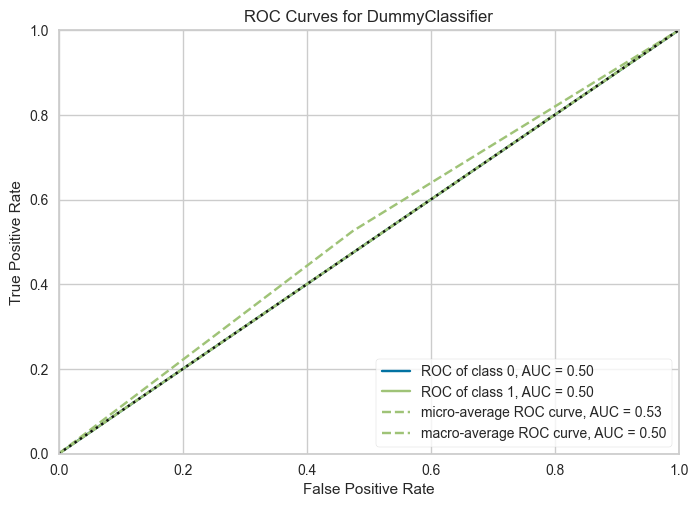

In [18]:
plot_model(d, plot = 'auc')

In [35]:
evaluate_model(d)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [19]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5932,0.5845,0.6875,0.6111,0.6471,0.1710,0.1726
1,0.4576,0.4566,0.4688,0.5000,0.4839,-0.0863,-0.0865
2,0.5763,0.5631,0.7188,0.5897,0.6479,0.1288,0.1328
3,0.5085,0.5122,0.4688,0.5556,0.5085,0.0240,0.0243
4,0.4068,0.4068,0.4062,0.4483,0.4262,-0.1847,-0.1857
5,0.3898,0.3883,0.4062,0.4333,0.4194,-0.2221,-0.2226
6,0.4407,0.4388,0.4545,0.5000,0.4762,-0.1209,-0.1215
7,0.4138,0.4038,0.5000,0.4706,0.4848,-0.1937,-0.1942
8,0.5000,0.4964,0.5312,0.5484,0.5397,-0.0072,-0.0072


In [20]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5254,0.5764,0.8750,0.5385,0.6667,-0.0147,-0.0214
1,0.5593,0.4392,0.9688,0.5536,0.7045,0.0460,0.0971
2,0.5763,0.5156,0.9375,0.5660,0.7059,0.0912,0.1412
3,0.5763,0.6562,0.9688,0.5636,0.7126,0.0856,0.1583
4,0.5424,0.5932,0.9062,0.5472,0.6824,0.0185,0.0286
5,0.5932,0.5434,0.9062,0.5800,0.7073,0.1355,0.1780
6,0.5763,0.5600,0.8485,0.5833,0.6914,0.0844,0.1010
7,0.5000,0.4844,0.6250,0.5405,0.5797,-0.0294,-0.0298
8,0.5690,0.6022,0.8750,0.5714,0.6914,0.0717,0.0925


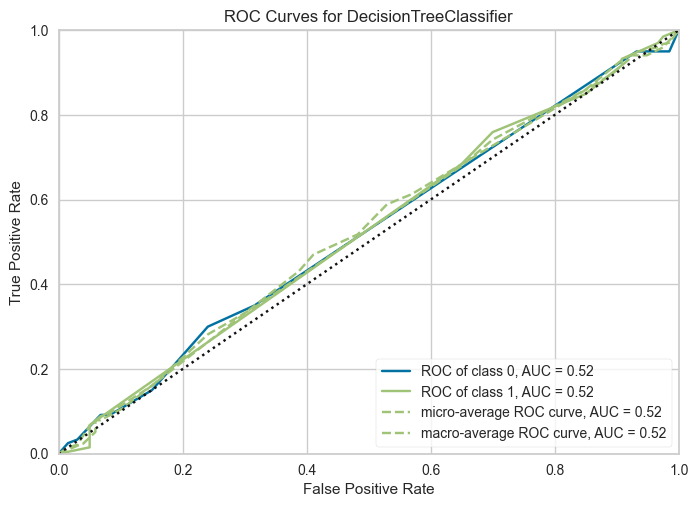

In [21]:
plot_model(tuned_dt, plot = 'auc')

In [34]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Output

In [28]:
hist=predict_model(tuned_dt,data=test_data)
hist.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,Label,Score
0,65,0,4,185,131,0,0,160,1,0.756129,2,1,0.5831
1,60,1,3,124,157,0,0,102,1,0.575002,2,1,0.5831
2,32,1,1,120,306,0,1,100,0,-0.140343,3,1,0.5476
3,76,1,3,105,220,1,0,169,0,0.836100,1,1,0.5831
4,61,1,4,124,223,0,0,128,0,3.051848,0,1,0.5831


In [37]:
hist.to_csv('file2.csv', header=True, index=False)